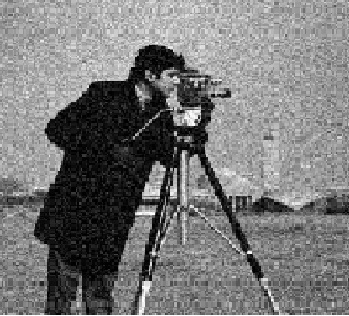

Original Image


<ipython-input-1-3b1fa59c8923>:25: RuntimeWarning: overflow encountered in scalar subtract
  gi = gaussian(image[n_x, n_y] - image[row, col], sigma_i)



Test Case 1: Diameter=3, Sigma_i=30.0, Sigma_s=30.0


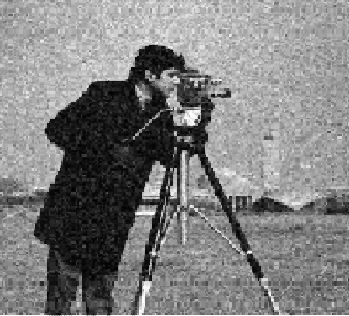


Test Case 2: Diameter=5, Sigma_i=40.0, Sigma_s=40.0


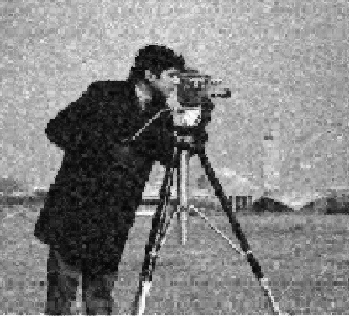


Test Case 3: Diameter=7, Sigma_i=50.0, Sigma_s=50.0


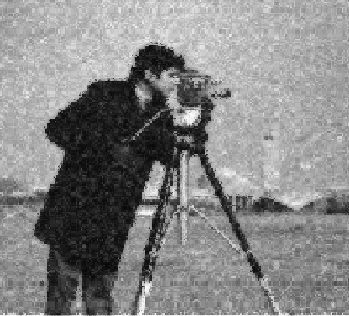


Test Case 4: Diameter=9, Sigma_i=60.0, Sigma_s=60.0


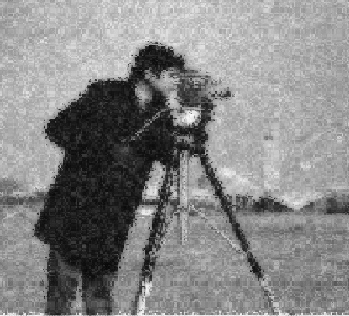

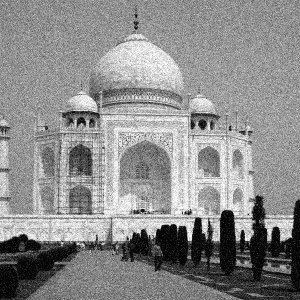

Original Image

Test Case 1: Diameter=3, Sigma_i=30.0, Sigma_s=30.0


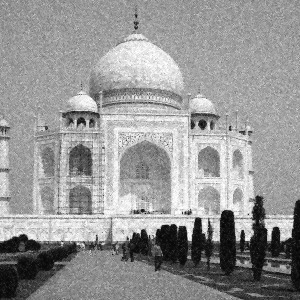


Test Case 2: Diameter=5, Sigma_i=40.0, Sigma_s=40.0


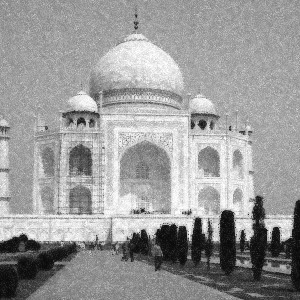


Test Case 3: Diameter=7, Sigma_i=50.0, Sigma_s=50.0


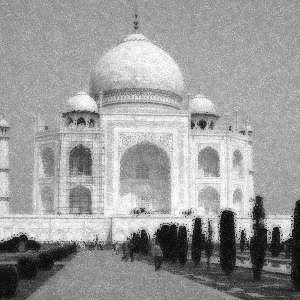


Test Case 4: Diameter=9, Sigma_i=60.0, Sigma_s=60.0


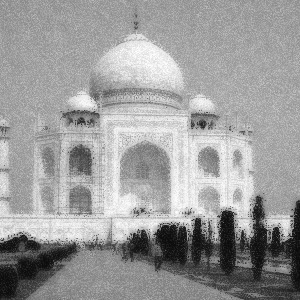

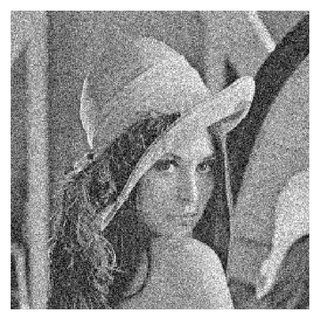

Original Image

Test Case 1: Diameter=3, Sigma_i=30.0, Sigma_s=30.0


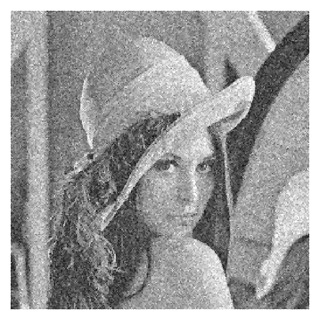


Test Case 2: Diameter=5, Sigma_i=40.0, Sigma_s=40.0


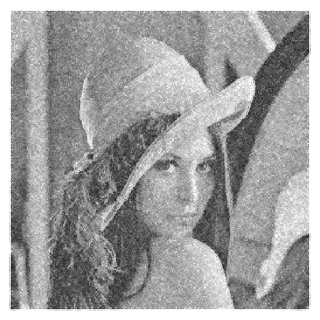


Test Case 3: Diameter=7, Sigma_i=50.0, Sigma_s=50.0


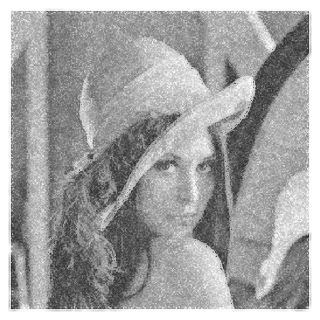


Test Case 4: Diameter=9, Sigma_i=60.0, Sigma_s=60.0


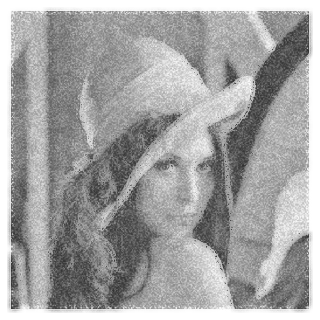

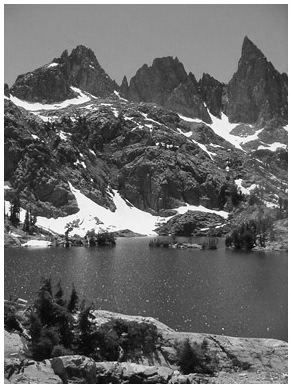

Original Image

Test Case 1: Diameter=3, Sigma_i=30.0, Sigma_s=30.0


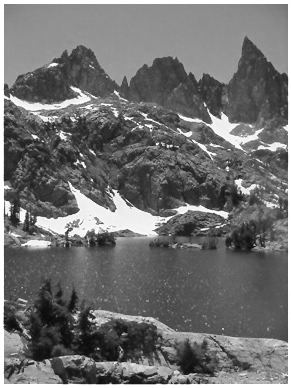


Test Case 2: Diameter=5, Sigma_i=40.0, Sigma_s=40.0


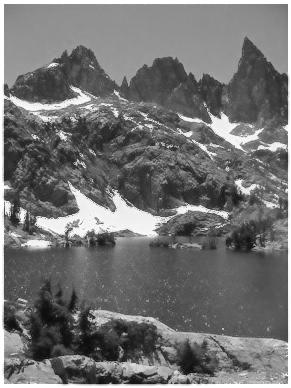


Test Case 3: Diameter=7, Sigma_i=50.0, Sigma_s=50.0


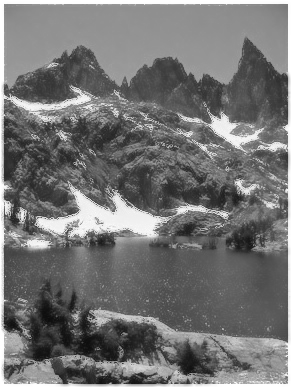


Test Case 4: Diameter=9, Sigma_i=60.0, Sigma_s=60.0


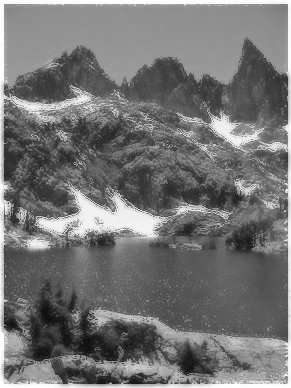

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def gaussian(x, sigma):
    return (1.0 / (2 * np.pi * sigma ** 2)) * np.exp(-(x ** 2) / (2 * sigma ** 2))

def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def bilateral_filter(image, diameter, sigma_i, sigma_s):
    radius = diameter // 2
    new_image = np.zeros(image.shape, dtype=np.float64)

    for row in range(len(image)):
        for col in range(len(image[0])):
            wp_total = 0
            filtered_pixel = 0

            for k in range(-radius, radius + 1):
                for l in range(-radius, radius + 1):
                    n_x = np.clip(row + k, 0, len(image) - 1)
                    n_y = np.clip(col + l, 0, len(image[0]) - 1)

                    gi = gaussian(image[n_x, n_y] - image[row, col], sigma_i)
                    gs = gaussian(distance(n_x, n_y, row, col), sigma_s)
                    wp = gi * gs
                    filtered_pixel += image[n_x, n_y] * wp
                    wp_total += wp

            if wp_total != 0:
                new_image[row, col] = filtered_pixel / wp_total
            else:
                new_image[row, col] = image[row, col]

    return np.uint8(np.round(new_image))

def run_tests(image_path):
    test_cases = [
        {"diameter": 3, "sigma_i": 30.0, "sigma_s": 30.0},
        {"diameter": 5, "sigma_i": 40.0, "sigma_s": 40.0},
        {"diameter": 7, "sigma_i": 50.0, "sigma_s": 50.0},
        {"diameter": 9, "sigma_i": 60.0, "sigma_s": 60.0},
    ]

    src = cv2.imread(image_path, 0)
    cv2_imshow(src)
    print("Original Image")

    for i, params in enumerate(test_cases):
        filtered_image = bilateral_filter(src, params["diameter"], params["sigma_i"], params["sigma_s"])
        print(f"\nTest Case {i+1}: Diameter={params['diameter']}, Sigma_i={params['sigma_i']}, Sigma_s={params['sigma_s']}")
        cv2_imshow(filtered_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    run_tests("CameraMan1.jpg")
    run_tests("taj.jpg")
    run_tests("woman.jpg")
    run_tests("Valley.jpg")
